In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model

In [2]:
df_b=pd.read_csv('Bangalore.csv')
df_c=pd.read_csv('Chennai.csv')
df_d=pd.read_csv('Delhi.csv')
df_h=pd.read_csv('Hyderabad.csv')
df_k=pd.read_csv('Kolkata.csv')
df_m=pd.read_csv('Mumbai.csv')

In [3]:
df_b['City']='Banglore'
df_c['City']='Chennai'
df_d['City']='Delhi'
df_h['City']='Hyderabad'
df_k['City']='Kolkata'
df_m['City']='Mumbai'

In [4]:
df=pd.concat([df_b, df_c, df_d, df_h, df_k, df_m]).reset_index(drop=True)
df.head(7)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Banglore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Banglore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Banglore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Banglore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Banglore
5,6797000,1220,Horamavu,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Banglore
6,20000000,2502,Thanisandra,4,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Banglore


In [5]:
df['Price']= df['Price']/10**5

Save it as a new CSV file under the name -> "House_city.csv"

In [6]:
df.to_csv('House_city.csv', index=False)

In [7]:
df.shape

(32963, 41)

In [8]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'City'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                32963 non-null  float64
 1   Area                 32963 non-null  int64  
 2   Location             32963 non-null  object 
 3   No. of Bedrooms      32963 non-null  int64  
 4   Resale               32963 non-null  int64  
 5   MaintenanceStaff     32963 non-null  int64  
 6   Gymnasium            32963 non-null  int64  
 7   SwimmingPool         32963 non-null  int64  
 8   LandscapedGardens    32963 non-null  int64  
 9   JoggingTrack         32963 non-null  int64  
 10  RainWaterHarvesting  32963 non-null  int64  
 11  IndoorGames          32963 non-null  int64  
 12  ShoppingMall         32963 non-null  int64  
 13  Intercom             32963 non-null  int64  
 14  SportsFacility       32963 non-null  int64  
 15  ATM                  32963 non-null 

In [10]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
mean,116.867181,1293.362194,2.411765,0.381397,6.296454,6.403725,6.371325,6.351151,6.346328,6.356855,...,6.463671,6.272154,6.335497,6.259169,6.250887,6.261293,6.260413,6.259867,6.250675,6.260019
std,230.736815,763.703754,0.812800,0.485737,4.075024,3.917995,3.966385,3.996086,4.003140,3.987722,...,3.826128,4.109373,4.018912,4.127551,4.139083,4.124586,4.125815,4.126577,4.139378,4.126365
min,20.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.715000,853.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.110000,1125.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,120.000000,1500.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8545.999990,16000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [11]:
df.replace(9, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                32963 non-null  float64
 1   Area                 32963 non-null  int64  
 2   Location             32963 non-null  object 
 3   No. of Bedrooms      32962 non-null  float64
 4   Resale               32963 non-null  int64  
 5   MaintenanceStaff     10093 non-null  float64
 6   Gymnasium            10093 non-null  float64
 7   SwimmingPool         10093 non-null  float64
 8   LandscapedGardens    10093 non-null  float64
 9   JoggingTrack         10093 non-null  float64
 10  RainWaterHarvesting  10093 non-null  float64
 11  IndoorGames          10093 non-null  float64
 12  ShoppingMall         10093 non-null  float64
 13  Intercom             10093 non-null  float64
 14  SportsFacility       10093 non-null  float64
 15  ATM                  10093 non-null 

In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10093 entries, 0 to 26641
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                10093 non-null  float64
 1   Area                 10093 non-null  int64  
 2   Location             10093 non-null  object 
 3   No. of Bedrooms      10093 non-null  float64
 4   Resale               10093 non-null  int64  
 5   MaintenanceStaff     10093 non-null  float64
 6   Gymnasium            10093 non-null  float64
 7   SwimmingPool         10093 non-null  float64
 8   LandscapedGardens    10093 non-null  float64
 9   JoggingTrack         10093 non-null  float64
 10  RainWaterHarvesting  10093 non-null  float64
 11  IndoorGames          10093 non-null  float64
 12  ShoppingMall         10093 non-null  float64
 13  Intercom             10093 non-null  float64
 14  SportsFacility       10093 non-null  float64
 15  ATM                  10093 non-null 

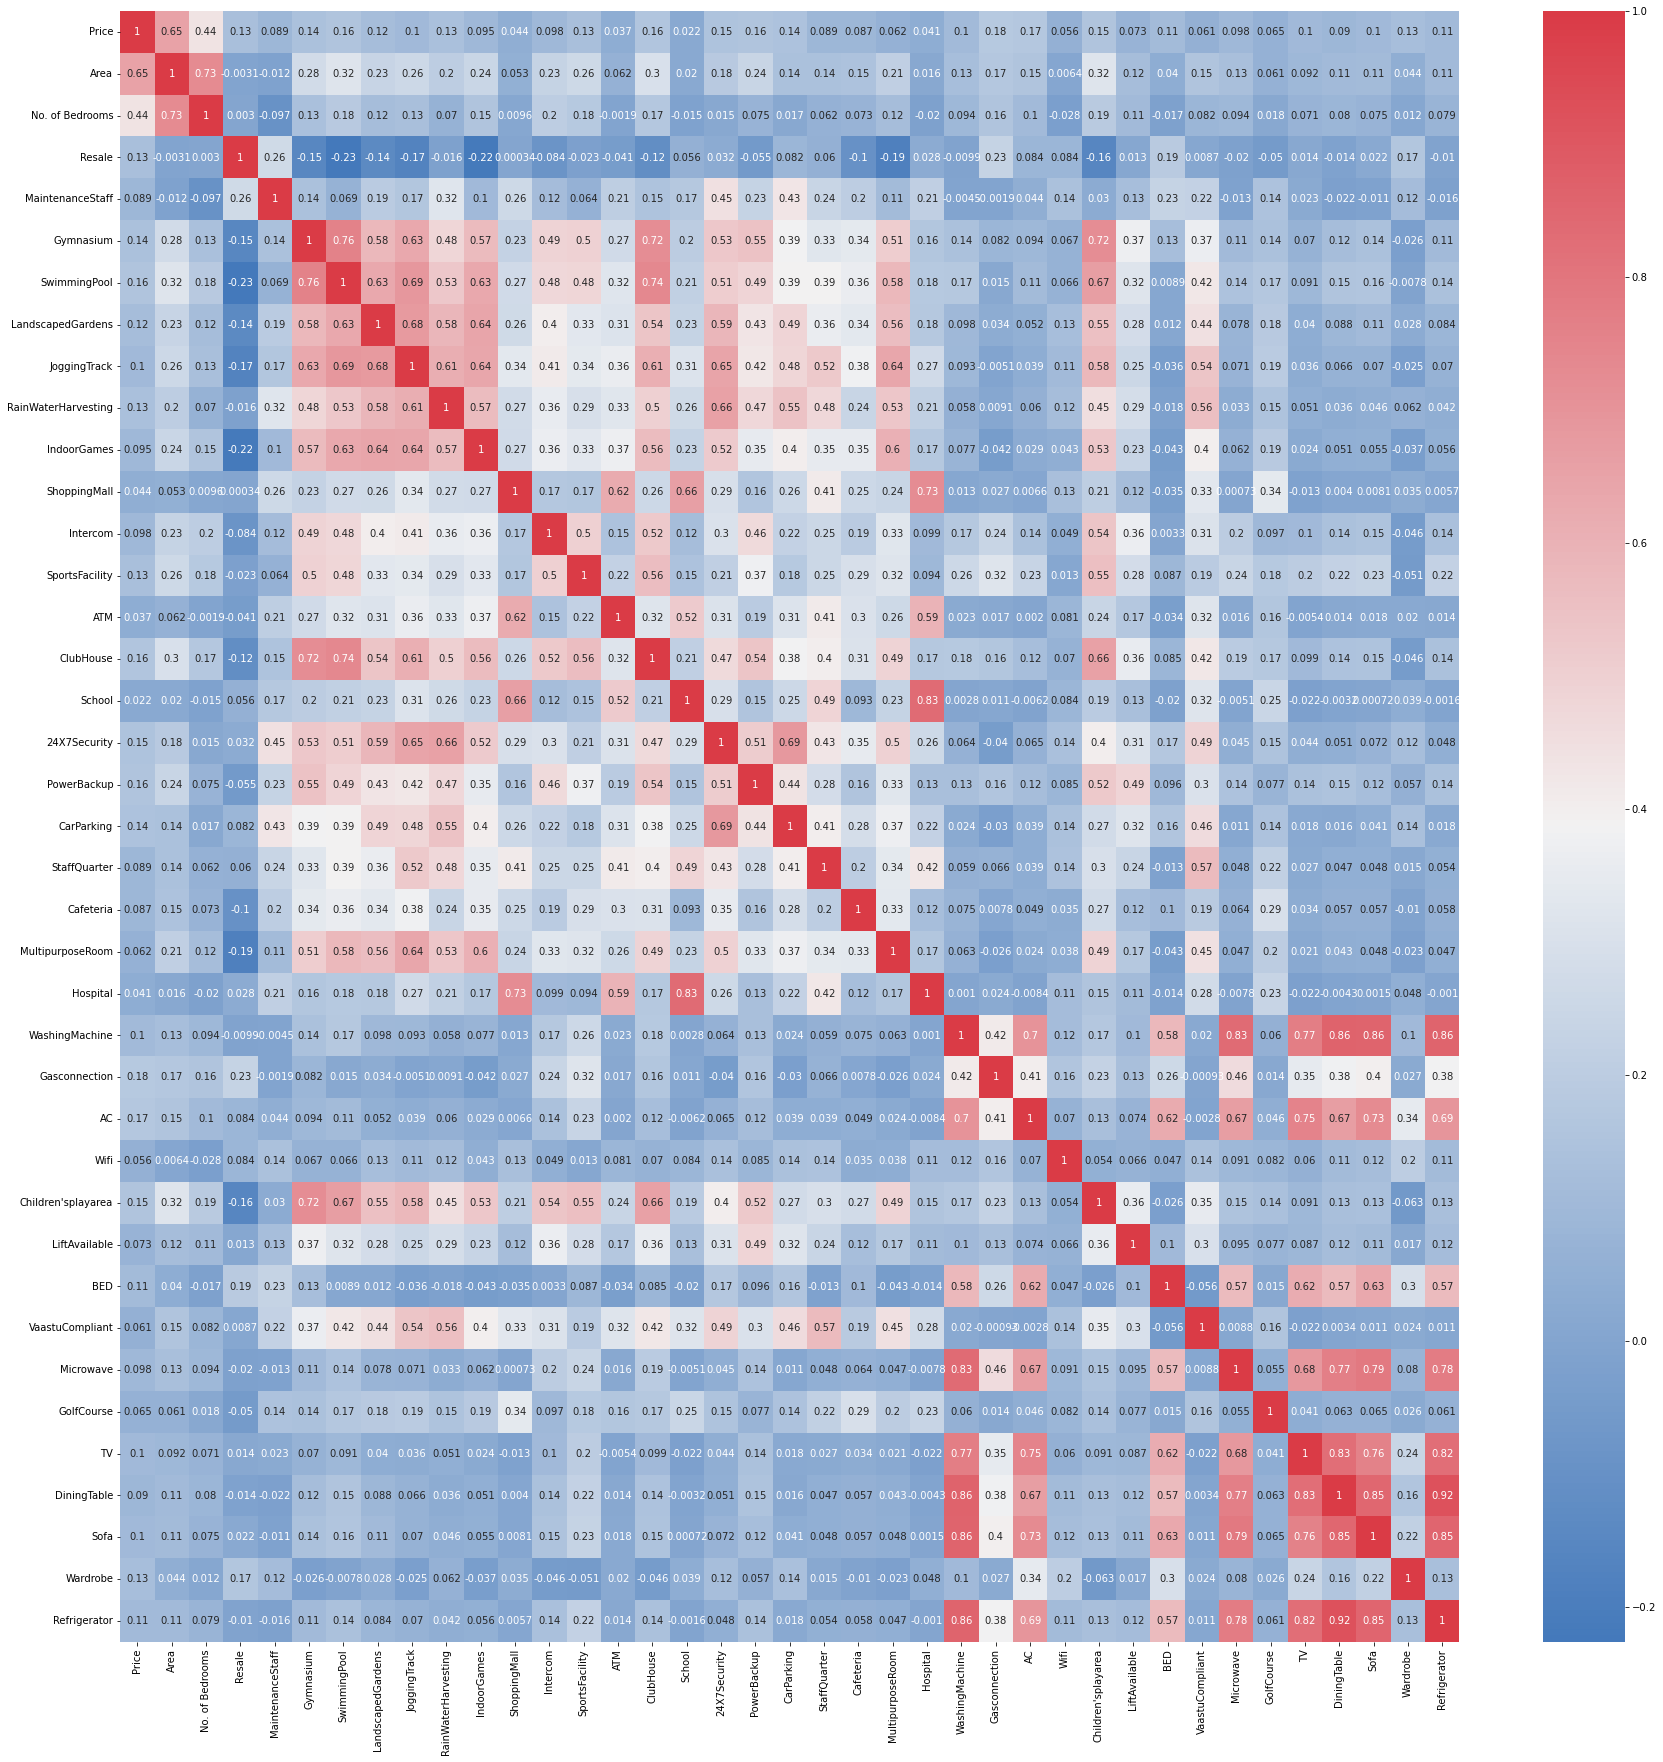

In [13]:
corr_m=df.corr()
fig, ax = plt.subplots(figsize=(30,30))
                               
cmap = sb.diverging_palette(250,10,as_cmap=True)
sb.heatmap(corr_m,annot=True,cmap=cmap)
plt.show()

In [14]:
#seeing which factors affect house price rate in ascending values only top 10
corr_m['Price'].sort_values(ascending=False)

Price                  1.000000
Area                   0.652585
No. of Bedrooms        0.439123
Gasconnection          0.176744
AC                     0.168448
ClubHouse              0.156836
PowerBackup            0.156585
SwimmingPool           0.156452
Children'splayarea     0.152377
24X7Security           0.148066
CarParking             0.143605
Gymnasium              0.140537
RainWaterHarvesting    0.134042
SportsFacility         0.130813
Resale                 0.128312
Wardrobe               0.125293
LandscapedGardens      0.123177
BED                    0.112406
Refrigerator           0.107972
WashingMachine         0.104595
TV                     0.103201
JoggingTrack           0.101692
Sofa                   0.099936
Microwave              0.098230
Intercom               0.097880
IndoorGames            0.095156
DiningTable            0.089542
StaffQuarter           0.088917
MaintenanceStaff       0.088580
Cafeteria              0.087466
LiftAvailable          0.073478
GolfCour

In [23]:
X=df.drop(['Price','Location'],axis='columns')
Y=df.Price

In [24]:
X=pd.get_dummies(X, columns = ['City'])

In [17]:
X.head(5)

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,DiningTable,Sofa,Wardrobe,Refrigerator,City_Banglore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,3340,4.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1,1045,2.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,1179,2.0,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
3,1675,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
4,1670,3.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0


In [18]:
Y.head(5)

0    300.00
1     78.88
2     48.66
3     83.58
4     68.45
Name: Price, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)

In [20]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=reg.predict(X_test)

In [22]:
reg.score(X_test,y_test)

0.6833825955700732

WE can predict price with an accuracy of 68.3% 